<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fdarren/00_data_annotation_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Labeling and Sampling

## Data Ingestion

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
#changes

In [ ]:
datetimeevents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/datetimeevents.csv')
diagnosis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/diagnosis.csv')
vitalsign = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/vitalsign.csv')
patient_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/patients.csv')

In [ ]:
print(f'datetimeevents shape: {datetimeevents.shape}')
print(f'diagnosis shape: {diagnosis.shape}')
print(f'vitalsign shape: {vitalsign.shape}')
print(f'patient_info shape: {patient_info.shape}')

datetimeevents shape: (7112999, 10)
diagnosis shape: (899050, 6)
vitalsign shape: (1564610, 11)
patient_info shape: (299712, 6)


### Data Overview

#### vitalsign

In [ ]:
vitalsign.head(5)

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


In [ ]:
print(vitalsign.dtypes)

subject_id       int64
stay_id          int64
charttime       object
temperature    float64
heartrate      float64
resprate       float64
o2sat          float64
sbp            float64
dbp            float64
rhythm          object
pain            object
dtype: object


#### diagnosis

In [ ]:
diagnosis.head(5)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [ ]:
print(diagnosis.dtypes)

subject_id      int64
stay_id         int64
seq_num         int64
icd_code       object
icd_version     int64
icd_title      object
dtype: object


There are a total of 13199 unique icd codes

In [ ]:
diagnosis['icd_code'].nunique()

13199

In [ ]:
# unique_diagnosis.to_csv('unique_diagnosis.csv', index = False)

#### datetimeevents

In [ ]:
datetimeevents.head(5)

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225754,2180-07-23 00:00:00,Date,0
1,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225755,2180-07-23 00:00:00,Date,0
2,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225754,2180-07-23 14:24:00,Date,0
3,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225755,2180-07-23 14:24:00,Date,0
4,10000980,26913865,39765666,36518,2189-06-27 09:13:00,2189-06-27 09:13:00,225755,2189-06-27 09:13:00,Date,0


In [ ]:
print(datetimeevents.dtypes)

subject_id       int64
hadm_id          int64
stay_id          int64
caregiver_id     int64
charttime       object
storetime       object
itemid           int64
value           object
valueuom        object
warning          int64
dtype: object


#### patient_info

In [ ]:
patient_info.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [ ]:
print(patient_info.dtypes)

subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object


##### Insights
**Observations**


**Key Takeaway**


## Data Labeling

Labelling target class based on the given journal:
*italicized text*
https://www.ahajournals.org/doi/10.1161/01.str.0000174293.17959.a1

- explains stroke related icd codes
- rule based risk factor

| Stroke Type | ICD-9 Code | Definition | ICD-10 Code | Definition |
|------------|------------|-----------------------------|------------|------------------------------------------------|
| **AIS**    | 362.3      | Retinal vascular occlusion | H34.1      | Central retina artery occlusion |
|            | 433.x1     | Occlusion and stenosis of precerebral arteries | I63.x | Cerebral infarction |
|            | 434.x1     | Occlusion of cerebral arteries | I64.x | Stroke, not specified as hemorrhage or infarction |
|            | 436        | Acute, but ill-defined cerebrovascular disease |  |  |
| **ICH**    | 431.x      | Intracerebral hemorrhage | I61.x | Intracerebral hemorrhage |
| **SAH**    | 430.x      | Subarachnoid hemorrhage | I60.x | Subarachnoid hemorrhage |
| **TIA**    | 435.x      | Transient cerebral ischemia | G45.x | Transient cerebral ischemic attacks and related syndromes |


### Stroke Patients: Mapping Stroke Diseases

In [ ]:
def extract_numeric_part(icd_code):
    """
    Extracts the numeric portion of an ICD code.
    - For ICD-10 codes starting with a letter (e.g., 'I63.x', 'H34.1'), it removes the prefix and extracts the first numeric part.
    - For ICD-9 codes (e.g., '362.3', '433.x1'), it extracts the first three digits before any decimal or letter.
    - Returns None if the conversion fails.
    """
    try:
        if icd_code[0].isalpha():
            return int(icd_code[1:].split('.')[0])
        else:
            return int(icd_code.split('.')[0])
    except ValueError:
        return None


In [ ]:
diagnosis['numeric_part'] = diagnosis['icd_code'].apply(extract_numeric_part)

In [ ]:
"""
Filter the diagnosis DataFrame to include only stroke-related ICD codes from both ICD-9 and ICD-10.
- ICD-10: Includes codes I60.x to I64.x (numeric parts 60-64), H34.1 (retinal occlusion), and G45.x (transient ischemic attacks).
- ICD-9: Includes codes 430.x to 436.x (numeric parts 430-436).
The filtering is done using the extracted numeric part of each ICD code.
"""

icd10_valid_ranges = range(60, 65)
icd9_valid_ranges = range(430, 437)

filtered_stroke_df = diagnosis[
    ((diagnosis['icd_code'].str.startswith('I')) & diagnosis['numeric_part'].isin(icd10_valid_ranges)) |
    ((diagnosis['icd_code'].str.startswith('H')) & (diagnosis['numeric_part'] == 34)) |
    ((diagnosis['icd_code'].str.startswith('G')) & (diagnosis['numeric_part'] == 45)) |
    (diagnosis['numeric_part'].isin(icd9_valid_ranges))
]

In [ ]:
filtered_stroke_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part
851,10008819,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0
1142,10011668,35710125,3,V433,9,HEART VALVE REPLAC NEC,433.0
1152,10011668,38526562,4,V433,9,HEART VALVE REPLAC NEC,433.0
1466,10014652,39135441,1,M436,10,Torticollis,436.0
1978,10019781,37784973,3,F430,10,Acute stress reaction,430.0
...,...,...,...,...,...,...,...
897497,19981210,39921076,3,V433,9,HEART VALVE REPLAC NEC,433.0
898399,19992365,31129242,1,431,9,INTRACEREBRAL HEMORRHAGE,431.0
898477,19992885,34321224,1,431,9,INTRACEREBRAL HEMORRHAGE,431.0
898856,19997666,33458418,1,M436,10,Torticollis,436.0


<ipython-input-230-f59c10e06ac6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icd_counts.index, y=icd_counts.values, palette="Blues_r")


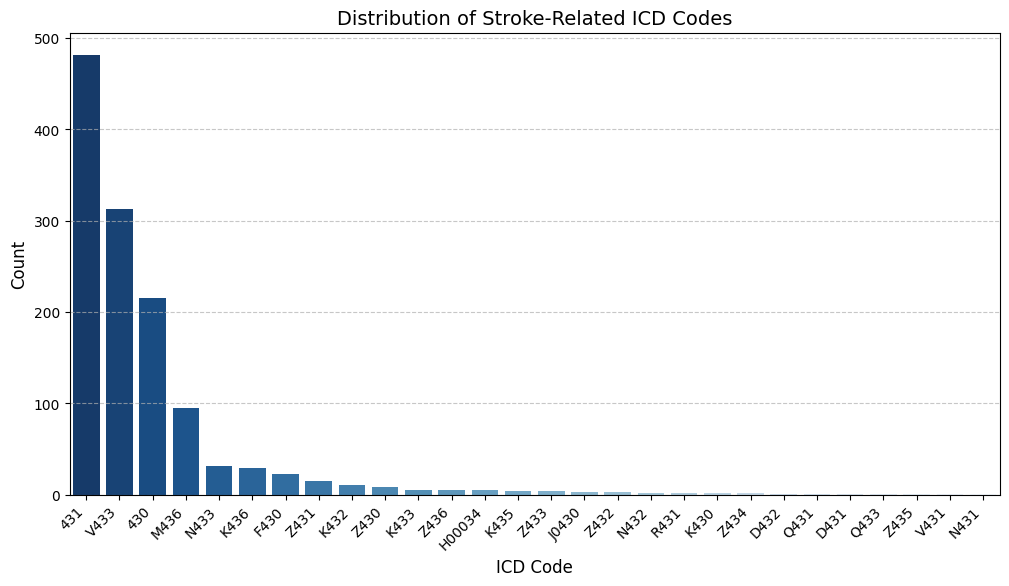

In [ ]:
icd_counts = filtered_stroke_df['icd_code'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=icd_counts.index, y=icd_counts.values, palette="Blues_r")

plt.xlabel("ICD Code", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Stroke-Related ICD Codes", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
print(f"Number of Different Patients: {filtered_stroke_df['subject_id'].nunique()}")

Number of Different Patients: 1184


#### Labeling Stroke

In [ ]:
labeled_stroke_df = filtered_stroke_df.copy()
labeled_stroke_df['Stroke_Y/N'] = 1

In [ ]:
labeled_stroke_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
851,10008819,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1
1142,10011668,35710125,3,V433,9,HEART VALVE REPLAC NEC,433.0,1
1152,10011668,38526562,4,V433,9,HEART VALVE REPLAC NEC,433.0,1
1466,10014652,39135441,1,M436,10,Torticollis,436.0,1
1978,10019781,37784973,3,F430,10,Acute stress reaction,430.0,1
...,...,...,...,...,...,...,...,...
897497,19981210,39921076,3,V433,9,HEART VALVE REPLAC NEC,433.0,1
898399,19992365,31129242,1,431,9,INTRACEREBRAL HEMORRHAGE,431.0,1
898477,19992885,34321224,1,431,9,INTRACEREBRAL HEMORRHAGE,431.0,1
898856,19997666,33458418,1,M436,10,Torticollis,436.0,1


#### Sampling Stroke Patients

- for now we use all available stroke patients

In [ ]:
sampled_stroke_subjects = labeled_stroke_df.sample(n=100, random_state=42)

### Non-Stroke Patients

In [ ]:
filtered_other_disease_df = diagnosis[
    ~((diagnosis['icd_code'].str.startswith('I')) & diagnosis['numeric_part'].isin(icd10_valid_ranges)) |
    ~((diagnosis['icd_code'].str.startswith('H')) & (diagnosis['numeric_part'] == 34)) |
    ~((diagnosis['icd_code'].str.startswith('G')) & (diagnosis['numeric_part'] == 45)) |
    ~(diagnosis['numeric_part'].isin(icd9_valid_ranges))
]

filtered_other_disease_df = filtered_other_disease_df.drop(columns=['numeric_part'])

In [ ]:
filtered_other_disease_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


#### Labeling Non-Stroke

In [ ]:
labeled_no_stroke_df = filtered_other_disease_df.copy()
labeled_no_stroke_df['Stroke_Y/N'] = 0

In [ ]:
labeled_no_stroke_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,Stroke_Y/N
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,0
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,0
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,0
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",0
4,10000032,33258284,2,78959,9,OTHER ASCITES,0
...,...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine,0
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,0
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...,0
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified",0


#### Sampling Non-Stroke
- lets try 1000 samples

In [ ]:
sampled_non_stroke_df = filtered_other_disease_df.sample(n=1000, random_state=42)

In [ ]:
sampled_non_stroke_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
109196,11222178,33435636,2,E9270,9,OVEREXERTION FROM SUDDEN STRENUOUS MOVEMENT
177839,11997943,37331314,5,311,9,DEPRESSIVE DISORDER
809326,18992105,36448518,1,J441,10,Chronic obstructive pulmonary disease w (acute...
608476,16770565,34392346,1,R531,10,Weakness
353179,13960004,32868203,2,E9170,9,STRUCK IN SPORTS WITHOUT FALL
...,...,...,...,...,...,...
207462,12329318,32783176,1,30500,9,ALCOHOL ABUSE-UNSPEC
603422,16708867,35084943,2,07999,9,UNSPEC VIRAL INFECTION
653231,17265593,36063725,3,W1830XA,10,"Fall on same level, unspecified, initial encou..."
505098,15616719,30600136,1,99832,9,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WOUND


## Combining our sample of Stroke and Non-Stroke Patients
- 100 stroke patients
- 1000 non stroke patients

We have created a dataset where stroke disease is about 10% of the dataset

In [ ]:
combined_df = pd.concat([labeled_stroke_df, sampled_non_stroke_df], ignore_index=True)

In [ ]:
combined_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10008819,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0
1,10011668,35710125,3,V433,9,HEART VALVE REPLAC NEC,433.0,1.0
2,10011668,38526562,4,V433,9,HEART VALVE REPLAC NEC,433.0,1.0
3,10014652,39135441,1,M436,10,Torticollis,436.0,1.0
4,10019781,37784973,3,F430,10,Acute stress reaction,430.0,1.0
...,...,...,...,...,...,...,...,...
2261,12329318,32783176,1,30500,9,ALCOHOL ABUSE-UNSPEC,NaN,NaN
2262,16708867,35084943,2,07999,9,UNSPEC VIRAL INFECTION,NaN,NaN
2263,17265593,36063725,3,W1830XA,10,"Fall on same level, unspecified, initial encou...",NaN,NaN
2264,15616719,30600136,1,99832,9,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WOUND,NaN,NaN


## Merging the Stroke and Non-stroke Patients Dataset to the datetimeevents and vital sign dataset

- In MIMIC-IV, datetimeevents records time-stamped clinical interventions (e.g., ventilation start/stop), while chartevents captures high-frequency physiological measurements (e.g., heart rate, blood pressure) for patient monitoring.

In [ ]:
unique_stroke_subjects = combined_df['subject_id'].unique()
print(f"Number of Unique Subject IDs: {len(unique_stroke_subjects)}")

Number of Unique Subject IDs: 2165


In [ ]:
datetimeevents_filtered = datetimeevents[datetimeevents['subject_id'].isin(unique_stroke_subjects)]
vitalsign_filtered = vitalsign[vitalsign['subject_id'].isin(unique_stroke_subjects)]

In [ ]:
print(f"datetimeevents shape: {datetimeevents_filtered.shape}")
print(f"vitalsign shape: {vitalsign_filtered.shape}")

datetimeevents shape: (219183, 10)
vitalsign shape: (47632, 11)


In [ ]:
combined_df.columns

Index(['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version',
       'icd_title', 'numeric_part', 'Stroke_Y/N'],
      dtype='object')

#### Performing Merge

In [ ]:
merged_vs_df = pd.merge(vitalsign_filtered, combined_df, how='right', on='subject_id')

In [ ]:
merged_vs_df

,subject_id,stay_id_x,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain,stay_id_y,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10008819,30329888.0,2169-06-21 20:13:00,99.2,107.0,16.0,100.0,181.0,99.0,NaN,0,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0
1,10008819,30329888.0,2169-06-22 00:18:00,97.7,95.0,16.0,100.0,182.0,103.0,NaN,NaN,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0
2,10008819,30329888.0,2169-06-22 02:59:00,NaN,89.0,16.0,100.0,182.0,101.0,NaN,NaN,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0
3,10008819,30329888.0,2169-06-22 05:24:00,98.2,86.0,16.0,100.0,156.0,91.0,NaN,0,30329888,1,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0
4,10011668,32178708.0,2133-12-07 00:51:00,98.6,83.0,16.0,97.0,155.0,85.0,NaN,8,35710125,3,V433,9,HEART VALVE REPLAC NEC,433.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52285,15616719,39646065.0,2190-10-11 04:42:00,98.2,78.0,18.0,100.0,135.0,70.0,NaN,3,30600136,1,99832,9,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WOUND,NaN,NaN
52286,17288833,33036976.0,2170-02-15 00:24:00,98.5,78.0,20.0,99.0,127.0,64.0,NaN,9,33036976,1,6826,9,CELLULITIS OF LEG,NaN,NaN
52287,17288833,33036976.0,2170-02-15 01:00:00,NaN,68.0,18.0,97.0,131.0,65.0,NaN,NaN,33036976,1,6826,9,CELLULITIS OF LEG,NaN,NaN
52288,17288833,33036976.0,2170-02-15 02:00:00,NaN,94.0,16.0,94.0,120.0,64.0,Normal Sinus Rhythm,NaN,33036976,1,6826,9,CELLULITIS OF LEG,NaN,NaN


## Merging with Patient Info dataset

In [ ]:
merged_pi_df = pd.merge(merged_vs_df, patient_info, how='left', on='subject_id')

In [ ]:
merged_pi_df.shape

(52290, 23)

In [ ]:
merged_pi_df

,subject_id,stay_id_x,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10008819,30329888.0,2169-06-21 20:13:00,99.2,107.0,16.0,100.0,181.0,99.0,NaN,...,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0,F,55,2169,2017 - 2019,NaN
1,10008819,30329888.0,2169-06-22 00:18:00,97.7,95.0,16.0,100.0,182.0,103.0,NaN,...,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0,F,55,2169,2017 - 2019,NaN
2,10008819,30329888.0,2169-06-22 02:59:00,NaN,89.0,16.0,100.0,182.0,101.0,NaN,...,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0,F,55,2169,2017 - 2019,NaN
3,10008819,30329888.0,2169-06-22 05:24:00,98.2,86.0,16.0,100.0,156.0,91.0,NaN,...,K436,10,Other and unsp ventral hernia with obstruction...,436.0,1.0,F,55,2169,2017 - 2019,NaN
4,10011668,32178708.0,2133-12-07 00:51:00,98.6,83.0,16.0,97.0,155.0,85.0,NaN,...,V433,9,HEART VALVE REPLAC NEC,433.0,1.0,F,54,2130,2008 - 2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52285,15616719,39646065.0,2190-10-11 04:42:00,98.2,78.0,18.0,100.0,135.0,70.0,NaN,...,99832,9,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WOUND,NaN,NaN,F,23,2188,2008 - 2010,NaN
52286,17288833,33036976.0,2170-02-15 00:24:00,98.5,78.0,20.0,99.0,127.0,64.0,NaN,...,6826,9,CELLULITIS OF LEG,NaN,NaN,M,45,2170,2014 - 2016,NaN
52287,17288833,33036976.0,2170-02-15 01:00:00,NaN,68.0,18.0,97.0,131.0,65.0,NaN,...,6826,9,CELLULITIS OF LEG,NaN,NaN,M,45,2170,2014 - 2016,NaN
52288,17288833,33036976.0,2170-02-15 02:00:00,NaN,94.0,16.0,94.0,120.0,64.0,Normal Sinus Rhythm,...,6826,9,CELLULITIS OF LEG,NaN,NaN,M,45,2170,2014 - 2016,NaN


In [ ]:
merged_pi_df.columns

Index(['subject_id', 'stay_id_x', 'charttime', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', 'rhythm', 'pain', 'stay_id_y',
       'seq_num', 'icd_code', 'icd_version', 'icd_title', 'numeric_part',
       'Stroke_Y/N', 'gender', 'anchor_age', 'anchor_year',
       'anchor_year_group', 'dod'],
      dtype='object')

### Shuffle Dataset Before Saving

In [ ]:
shuffled_df = merged_pi_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
shuffled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_sampled_data.csv', index = False)

<ipython-input-263-48b083bcb211>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitalsign_filtered['charttime'] = pd.to_datetime(vitalsign_filtered['charttime'])


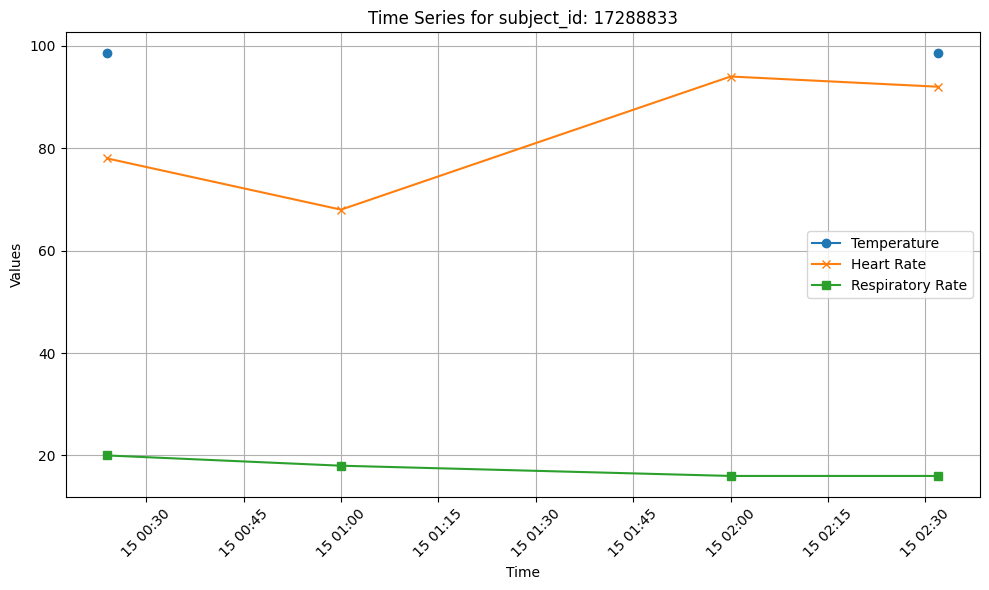

In [ ]:

"""

Time Series Plot for specified subject id

"""
vitalsign_filtered['charttime'] = pd.to_datetime(vitalsign_filtered['charttime'])
subject_id = 17288833
subject_data = vitalsign_filtered[vitalsign_filtered['subject_id'] == subject_id]

subject_data.set_index('charttime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(subject_data.index, subject_data['temperature'], label='Temperature', marker='o')
plt.plot(subject_data.index, subject_data['heartrate'], label='Heart Rate', marker='x')
plt.plot(subject_data.index, subject_data['resprate'], label='Respiratory Rate', marker='s')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title(f'Time Series for subject_id: {subject_id}')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
subject_id_counts = shuffled_df['subject_id'].value_counts()

average_appearances = subject_id_counts.mean()

print(f"The average number of appearances for each unique subject_id is: {average_appearances:.2f}")


The average number of appearances for each unique subject_id is: 24.15


There are 25677 subjects in the diagnosis dataset, for memory efficiency we will look at only 500

In [ ]:
shuffled_df.shape

(52290, 23)

Looking at null values

In [ ]:
null_values = shuffled_df.isnull().sum()
print(null_values)

subject_id               0
stay_id_x              116
charttime              116
temperature          20667
heartrate             2296
resprate              2934
o2sat                 4759
sbp                   2548
dbp                   2548
rhythm               49745
pain                 15129
stay_id_y                0
seq_num                  0
icd_code                 0
icd_version              0
icd_title                0
numeric_part         30280
Stroke_Y/N           30280
gender                   0
anchor_age               0
anchor_year              0
anchor_year_group        0
dod                  39037
dtype: int64


Dropping the following columns and the respective reasons:  
1) Temperature: 11267/24280 are null values, and reading of temperature itself is not a strong predictor itself to predict stroke

2) Rhythm: 23438/24280, too little data to make this column useful as a predictor  

3) Pain: data types vary too much, from integer to string inputs, if this column is needed to be used, NLP is needed to analyze text meaning  

4) dod: dead of death does not necessarily attribute to stroke predict just yet, maybe feature engineering of using dod and date of admittance and calculating months survived after diagnosis can help to find severity

In [ ]:
shuffled_df = shuffled_df.drop(columns = ['temperature','rhythm','pain','dod'])

Interpolate missing values in vital signs


In [ ]:
shuffled_df['heartrate'].interpolate(method='linear', inplace=True)
shuffled_df['resprate'].interpolate(method='linear', inplace=True)
shuffled_df['o2sat'].interpolate(method='linear', inplace=True)
shuffled_df['sbp'].interpolate(method='linear', inplace=True)
shuffled_df['dbp'].interpolate(method='linear', inplace=True)


<ipython-input-260-0cddd96d87a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shuffled_df['heartrate'].interpolate(method='linear', inplace=True)
<ipython-input-260-0cddd96d87a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
null_values = shuffled_df.isnull().sum()
print(null_values)

subject_id               0
stay_id_x              116
charttime              116
heartrate                0
resprate                 0
o2sat                    0
sbp                      0
dbp                      0
stay_id_y                0
seq_num                  0
icd_code                 0
icd_version              0
icd_title                0
numeric_part         30280
Stroke_Y/N           30280
gender                   0
anchor_age               0
anchor_year              0
anchor_year_group        0
dtype: int64


In [ ]:
df_selected = shuffled_df[['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'icd_code','icd_version', 'NIHSS_Score', 'gender', 'anchor_age']]

KeyError: "['NIHSS_Score'] not in index"

In [ ]:

le = LabelEncoder()

columns_to_encode = ['icd_code']

for col in columns_to_encode:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

In [ ]:
df_selected['gender'] = df_selected['gender'].replace({'M': 0, 'F': 1})

In [ ]:
df_selected.columns

In [ ]:


columns_to_check = ['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)  # Adjust rows and columns for the subplots
    plt.boxplot(df_selected[col].dropna(), vert=False)  # Drop NaN values and plot horizontally
    plt.title(col)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


In [ ]:

z_scores = np.abs(stats.zscore(df_selected.select_dtypes(include=[np.number])))

outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

outliers_rows = outliers.any(axis=1)


In [ ]:
df_cleaned = df_selected[~outliers_rows]


In [ ]:
df_cleaned

In [ ]:
df_cleaned.to_csv('input/preprocessed_data.csv', index = False)